## <font color = Navy > __Churn Model__ </font>
#### Case :
Trying to predict whether a customer in a bank is more likely to leave the bank or stay with it using the past record of 10000 customers.

In [15]:
import pandas as pd
import numpy as np
import seaborn as sea
import matplotlib.pyplot as plt
import keras
from keras.layers import Dense, Dropout
from keras.models import Sequential

In [3]:
data = pd.read_csv('./Churn_Modelling.csv', sep = ',')

In [4]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


### *Feature Matrix*

In [5]:
X = data.iloc[:,3:-1].values
X[:10]

array([[619, 'France', 'Female', 42, 2, 0.0, 1, 1, 1, 101348.88],
       [608, 'Spain', 'Female', 41, 1, 83807.86, 1, 0, 1, 112542.58],
       [502, 'France', 'Female', 42, 8, 159660.8, 3, 1, 0, 113931.57],
       [699, 'France', 'Female', 39, 1, 0.0, 2, 0, 0, 93826.63],
       [850, 'Spain', 'Female', 43, 2, 125510.82, 1, 1, 1, 79084.1],
       [645, 'Spain', 'Male', 44, 8, 113755.78, 2, 1, 0, 149756.71],
       [822, 'France', 'Male', 50, 7, 0.0, 2, 1, 1, 10062.8],
       [376, 'Germany', 'Female', 29, 4, 115046.74, 4, 1, 0, 119346.88],
       [501, 'France', 'Male', 44, 4, 142051.07, 2, 0, 1, 74940.5],
       [684, 'France', 'Male', 27, 2, 134603.88, 1, 1, 1, 71725.73]],
      dtype=object)

### *Labels*

In [6]:
Y = data.iloc[:,-1].values
Y[:10]


array([1, 0, 1, 0, 0, 1, 0, 1, 0, 0])

##### Preprocessing:
1. Encoding the Categorical data
2. Using standardisation on encoded dataset

In [7]:
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder
scl = StandardScaler()
label_x_1 = LabelEncoder()
oneHot = OneHotEncoder(categorical_features=[1])
X[:,1] = label_x_1.fit_transform(X[:,1])
X[:,2] = label_x_1.fit_transform(X[:,2])

In [8]:
X = oneHot.fit_transform(X).toarray()

/home/pratik/.local/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/home/pratik/.local/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [9]:
X[1]

array([0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 6.0800000e+02,
       0.0000000e+00, 4.1000000e+01, 1.0000000e+00, 8.3807860e+04,
       1.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.1254258e+05])

In [10]:
X = X[:,1:]

In [11]:
X = scl.fit_transform(X)

In [12]:
X[:2]

array([[-0.57873591, -0.57380915, -0.32622142, -1.09598752,  0.29351742,
        -1.04175968, -1.22584767, -0.91158349,  0.64609167,  0.97024255,
         0.02188649],
       [-0.57873591,  1.74273971, -0.44003595, -1.09598752,  0.19816383,
        -1.38753759,  0.11735002, -0.91158349, -1.54776799,  0.97024255,
         0.21653375]])

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size = 0.8, shuffle = True )

/home/pratik/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


### Predicting Churn yusing an ANN 

In [16]:
classifier = Sequential()
classifier.add(Dense(input_dim = 11, units = 6, activation = 'relu', kernel_initializer = 'uniform' ))

classifier.add(Dropout(rate = 0.1))
classifier.add(Dense(units = 8, activation = 'relu', kernel_initializer = 'uniform' ))
classifier.add(Dropout(rate = 0.2))
# classifier.add(Dense(units = 4, activation = 'relu', kernel_initializer = 'uniform' ))
# classifier.add(Dropout(rate = 0.2))
classifier.add(Dense(units = 1, activation = 'sigmoid', kernel_initializer = 'uniform' ))

classifier.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [30]:
class MyCallBack(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs = {}):
        if (np.abs(logs.get('acc') - logs.get('val_acc')) > 0.01):
            print("\n Differences in Validation and training accuracies increasing, so cancelling training!")
            self.model.stop_training = True
            

In [31]:
callback = MyCallBack()

In [32]:
classifier.fit(x_train, y_train, batch_size=50, epochs=150, validation_split=0.2, shuffle = True, callbacks=[callback])

Train on 6400 samples, validate on 1600 samples
Epoch 1/150
6400/6400 [==============================] - 1s 124us/step - loss: 0.4053 - acc: 0.8322 - val_loss: 0.3938 - val_acc: 0.8362
Epoch 2/150
6400/6400 [==============================] - 1s 123us/step - loss: 0.3993 - acc: 0.8373 - val_loss: 0.3943 - val_acc: 0.8369
Epoch 3/150
6400/6400 [==============================] - 1s 123us/step - loss: 0.4036 - acc: 0.8367 - val_loss: 0.3925 - val_acc: 0.8387
Epoch 4/150
6400/6400 [==============================] - 1s 84us/step - loss: 0.4038 - acc: 0.8369 - val_loss: 0.3930 - val_acc: 0.8387
Epoch 5/150
6400/6400 [==============================] - 0s 67us/step - loss: 0.4010 - acc: 0.8391 - val_loss: 0.3932 - val_acc: 0.8381
Epoch 6/150
6400/6400 [==============================] - 0s 74us/step - loss: 0.4000 - acc: 0.8386 - val_loss: 0.3926 - val_acc: 0.8400
Epoch 7/150
6400/6400 [==============================] - 0s 62us/step - loss: 0.4053 - acc: 0.8361 - val_loss: 0.3935 - val_acc: 0.83

6400/6400 [==============================] - 1s 101us/step - loss: 0.4041 - acc: 0.8372 - val_loss: 0.3940 - val_acc: 0.8350
Epoch 61/150
6400/6400 [==============================] - 1s 100us/step - loss: 0.4025 - acc: 0.8378 - val_loss: 0.3937 - val_acc: 0.8369
Epoch 62/150
6400/6400 [==============================] - 0s 50us/step - loss: 0.4068 - acc: 0.8347 - val_loss: 0.3936 - val_acc: 0.8381
Epoch 63/150
6400/6400 [==============================] - 0s 43us/step - loss: 0.4017 - acc: 0.8366 - val_loss: 0.3938 - val_acc: 0.8362
Epoch 64/150
6400/6400 [==============================] - 0s 44us/step - loss: 0.4042 - acc: 0.8364 - val_loss: 0.3934 - val_acc: 0.8387
Epoch 65/150
6400/6400 [==============================] - 0s 45us/step - loss: 0.4016 - acc: 0.8377 - val_loss: 0.3937 - val_acc: 0.8387
Epoch 66/150
6400/6400 [==============================] - 1s 107us/step - loss: 0.4002 - acc: 0.8378 - val_loss: 0.3936 - val_acc: 0.8369
Epoch 67/150
6400/6400 [===========================

6400/6400 [==============================] - 0s 57us/step - loss: 0.4008 - acc: 0.8398 - val_loss: 0.3950 - val_acc: 0.8356
Epoch 120/150
6400/6400 [==============================] - 0s 56us/step - loss: 0.4050 - acc: 0.8347 - val_loss: 0.3941 - val_acc: 0.8362
Epoch 121/150
6400/6400 [==============================] - 0s 60us/step - loss: 0.4057 - acc: 0.8362 - val_loss: 0.3951 - val_acc: 0.8362
Epoch 122/150
6400/6400 [==============================] - 0s 57us/step - loss: 0.4000 - acc: 0.8386 - val_loss: 0.3950 - val_acc: 0.8381
Epoch 123/150
6400/6400 [==============================] - 0s 50us/step - loss: 0.4040 - acc: 0.8375 - val_loss: 0.3953 - val_acc: 0.8362
Epoch 124/150
6400/6400 [==============================] - 1s 95us/step - loss: 0.4009 - acc: 0.8395 - val_loss: 0.3945 - val_acc: 0.8350
Epoch 125/150
6400/6400 [==============================] - 1s 111us/step - loss: 0.4032 - acc: 0.8369 - val_loss: 0.3948 - val_acc: 0.8356
Epoch 126/150
6400/6400 [======================

In [33]:
y_pred = classifier.predict(x_test)

In [34]:
y_pred = (y_pred > 0.5)

In [35]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [37]:
cm

array([[1526,   34],
       [ 325,  115]])

Text(33.0, 0.5, 'Predicted')

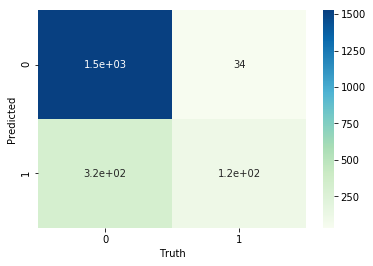

In [40]:
sea.heatmap(cm, annot= True, cmap='GnBu')
plt.xlabel('Truth')
plt.ylabel('Predicted')

### <font color = Navy >_New Prediction_</font>

Predict if the customer with the following informations will leave the bank:  
Geography: France  
Credit Score: 800  
Gender: Female  
Age: 32  
Tenure: 2  
Balance: 120000  
Number of Products: 1  
Has Credit Card: Yes  
Is Active Member: Yes  
Estimated Salary: 140000  

In [41]:
new_pred = classifier.predict(scl.transform(np.array([[0, 0, 800, 0, 32, 2,120000, 1, 1, 1, 140000 ]])))
new_pred 

/home/pratik/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[0.08315831]], dtype=float32)

Thus, the customer stayed with the bank.

### Improving the validity of results using cross-validation 

In [45]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
def build_classifier():
    classifier = Sequential()
    # input Layer and first inner layer with 6 nodes
    classifier.add(Dense(input_dim = 11, units = 6, activation = 'relu', kernel_initializer = 'uniform' ))
    classifier.add(Dropout(rate = 0.1))
    # second Layer 
    classifier.add(Dense(units = 8, activation = 'relu', kernel_initializer = 'uniform' ))
    classifier.add(Dropout(rate = 0.2))
    # output Layer
    classifier.add(Dense(units = 1, activation = 'sigmoid', kernel_initializer = 'uniform' ))

    classifier.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier


In [46]:
classifier = KerasClassifier(build_fn=build_classifier,batch_size=50, epochs=150, shuffle = True )

In [48]:
accuracy = cross_val_score(estimator=classifier, X=x_train, y=y_train, cv=10, n_jobs=-1)

Epoch 1/150
7200/7200 [==============================] - 2s 248us/step - loss: 0.6164 - acc: 0.8003
Epoch 2/150
7200/7200 [==============================] - 1s 118us/step - loss: 0.4513 - acc: 0.8007
Epoch 3/150
7200/7200 [==============================] - 1s 98us/step - loss: 0.4397 - acc: 0.8007
Epoch 4/150
7200/7200 [==============================] - 1s 96us/step - loss: 0.4323 - acc: 0.8007
Epoch 5/150
7200/7200 [==============================] - 1s 109us/step - loss: 0.4295 - acc: 0.8007
Epoch 6/150
7200/7200 [==============================] - 0s 44us/step - loss: 0.4292 - acc: 0.8007
Epoch 7/150
7200/7200 [==============================] - 0s 46us/step - loss: 0.4283 - acc: 0.8007
Epoch 8/150
7200/7200 [==============================] - 0s 59us/step - loss: 0.4278 - acc: 0.8007
Epoch 9/150
7200/7200 [==============================] - 0s 64us/step - loss: 0.4282 - acc: 0.8007
Epoch 10/150
7200/7200 [==============================] - 0s 48us/step - loss: 0.4254 - acc: 0.8007
Epoch 

7200/7200 [==============================] - 0s 54us/step - loss: 0.4137 - acc: 0.8361
Epoch 83/150
7200/7200 [==============================] - 0s 41us/step - loss: 0.4120 - acc: 0.8354
Epoch 84/150
7200/7200 [==============================] - 0s 42us/step - loss: 0.4118 - acc: 0.8364
Epoch 85/150
7200/7200 [==============================] - 0s 49us/step - loss: 0.4130 - acc: 0.8369
Epoch 86/150
7200/7200 [==============================] - 1s 74us/step - loss: 0.4134 - acc: 0.8347
Epoch 87/150
7200/7200 [==============================] - 1s 93us/step - loss: 0.4132 - acc: 0.8357
Epoch 88/150
7200/7200 [==============================] - 1s 92us/step - loss: 0.4112 - acc: 0.8358
Epoch 89/150
7200/7200 [==============================] - 1s 109us/step - loss: 0.4096 - acc: 0.8368
Epoch 90/150
7200/7200 [==============================] - 1s 109us/step - loss: 0.4108 - acc: 0.8387
Epoch 91/150
7200/7200 [==============================] - 1s 117us/step - loss: 0.4154 - acc: 0.8367
Epoch 92/1

7200/7200 [==============================] - 1s 140us/step - loss: 0.4123 - acc: 0.8254
Epoch 13/150
7200/7200 [==============================] - 1s 108us/step - loss: 0.4145 - acc: 0.8256
Epoch 14/150
7200/7200 [==============================] - 1s 86us/step - loss: 0.4172 - acc: 0.8271
Epoch 15/150
7200/7200 [==============================] - 0s 43us/step - loss: 0.4180 - acc: 0.8251
Epoch 16/150
7200/7200 [==============================] - 0s 43us/step - loss: 0.4138 - acc: 0.8272
Epoch 17/150
7200/7200 [==============================] - 0s 56us/step - loss: 0.4119 - acc: 0.8267
Epoch 18/150
7200/7200 [==============================] - 0s 55us/step - loss: 0.4132 - acc: 0.8246
Epoch 19/150
7200/7200 [==============================] - 0s 55us/step - loss: 0.4113 - acc: 0.8250
Epoch 20/150
7200/7200 [==============================] - 1s 70us/step - loss: 0.4082 - acc: 0.8275
Epoch 21/150
7200/7200 [==============================] - 1s 103us/step - loss: 0.4072 - acc: 0.8290
Epoch 22/1

7200/7200 [==============================] - 0s 63us/step - loss: 0.3828 - acc: 0.8432
Epoch 94/150
7200/7200 [==============================] - 0s 57us/step - loss: 0.3812 - acc: 0.8394
Epoch 95/150
7200/7200 [==============================] - 0s 48us/step - loss: 0.3866 - acc: 0.8368
Epoch 96/150
7200/7200 [==============================] - 0s 68us/step - loss: 0.3833 - acc: 0.8364
Epoch 97/150
7200/7200 [==============================] - 1s 106us/step - loss: 0.3824 - acc: 0.8379
Epoch 98/150
7200/7200 [==============================] - 1s 126us/step - loss: 0.3865 - acc: 0.8356
Epoch 99/150
7200/7200 [==============================] - 1s 131us/step - loss: 0.3836 - acc: 0.8385
Epoch 100/150
7200/7200 [==============================] - 1s 114us/step - loss: 0.3822 - acc: 0.8367
Epoch 101/150
7200/7200 [==============================] - 1s 94us/step - loss: 0.3898 - acc: 0.8337
Epoch 102/150
7200/7200 [==============================] - 1s 131us/step - loss: 0.3834 - acc: 0.8399
Epoch

7200/7200 [==============================] - 1s 100us/step - loss: 0.4237 - acc: 0.8254
Epoch 24/150
7200/7200 [==============================] - 1s 85us/step - loss: 0.4208 - acc: 0.8272
Epoch 25/150
7200/7200 [==============================] - 0s 54us/step - loss: 0.4232 - acc: 0.8285
Epoch 26/150
7200/7200 [==============================] - 0s 54us/step - loss: 0.4218 - acc: 0.8307
Epoch 27/150
7200/7200 [==============================] - 0s 47us/step - loss: 0.4229 - acc: 0.8296
Epoch 28/150
7200/7200 [==============================] - 0s 50us/step - loss: 0.4191 - acc: 0.8312
Epoch 29/150
7200/7200 [==============================] - 0s 54us/step - loss: 0.4235 - acc: 0.8325
Epoch 30/150
7200/7200 [==============================] - 1s 74us/step - loss: 0.4206 - acc: 0.8307
Epoch 31/150
7200/7200 [==============================] - 1s 105us/step - loss: 0.4216 - acc: 0.8314
Epoch 32/150
7200/7200 [==============================] - 1s 105us/step - loss: 0.4200 - acc: 0.8335
Epoch 33/1

7200/7200 [==============================] - 0s 56us/step - loss: 0.4171 - acc: 0.8351
Epoch 105/150
7200/7200 [==============================] - 0s 50us/step - loss: 0.4169 - acc: 0.8367
Epoch 106/150
7200/7200 [==============================] - 1s 101us/step - loss: 0.4190 - acc: 0.8368
Epoch 107/150
7200/7200 [==============================] - 1s 120us/step - loss: 0.4177 - acc: 0.8337
Epoch 108/150
7200/7200 [==============================] - 1s 109us/step - loss: 0.4195 - acc: 0.8361
Epoch 109/150
7200/7200 [==============================] - 1s 130us/step - loss: 0.4182 - acc: 0.8336
Epoch 110/150
7200/7200 [==============================] - 1s 115us/step - loss: 0.4173 - acc: 0.8337
Epoch 111/150
7200/7200 [==============================] - 1s 147us/step - loss: 0.4172 - acc: 0.8372
Epoch 112/150
7200/7200 [==============================] - 1s 80us/step - loss: 0.4223 - acc: 0.8351
Epoch 113/150
7200/7200 [==============================] - 0s 48us/step - loss: 0.4149 - acc: 0.836

7200/7200 [==============================] - 0s 54us/step - loss: 0.4160 - acc: 0.8336
Epoch 35/150
7200/7200 [==============================] - 0s 54us/step - loss: 0.4193 - acc: 0.8340
Epoch 36/150
7200/7200 [==============================] - 1s 98us/step - loss: 0.4185 - acc: 0.8336
Epoch 37/150
7200/7200 [==============================] - 1s 106us/step - loss: 0.4152 - acc: 0.8354
Epoch 38/150
7200/7200 [==============================] - 1s 119us/step - loss: 0.4215 - acc: 0.8336
Epoch 39/150
7200/7200 [==============================] - 1s 122us/step - loss: 0.4155 - acc: 0.8360
Epoch 40/150
7200/7200 [==============================] - 1s 111us/step - loss: 0.4182 - acc: 0.8344
Epoch 41/150
7200/7200 [==============================] - 1s 92us/step - loss: 0.4135 - acc: 0.8362
Epoch 42/150
7200/7200 [==============================] - 0s 56us/step - loss: 0.4157 - acc: 0.8365
Epoch 43/150
7200/7200 [==============================] - 0s 56us/step - loss: 0.4170 - acc: 0.8335
Epoch 44/

7200/7200 [==============================] - 1s 72us/step - loss: 0.4158 - acc: 0.8376
Epoch 116/150
7200/7200 [==============================] - 1s 94us/step - loss: 0.4131 - acc: 0.8378
Epoch 117/150
7200/7200 [==============================] - 1s 86us/step - loss: 0.4139 - acc: 0.8369
Epoch 118/150
7200/7200 [==============================] - 1s 101us/step - loss: 0.4134 - acc: 0.8376
Epoch 119/150
7200/7200 [==============================] - 1s 105us/step - loss: 0.4145 - acc: 0.8387
Epoch 120/150
7200/7200 [==============================] - 1s 135us/step - loss: 0.4145 - acc: 0.8362
Epoch 121/150
7200/7200 [==============================] - 1s 122us/step - loss: 0.4130 - acc: 0.8375
Epoch 122/150
7200/7200 [==============================] - 1s 114us/step - loss: 0.4127 - acc: 0.8393
Epoch 123/150
7200/7200 [==============================] - 0s 56us/step - loss: 0.4127 - acc: 0.8385
Epoch 124/150
7200/7200 [==============================] - 0s 59us/step - loss: 0.4159 - acc: 0.8394

7200/7200 [==============================] - 0s 60us/step - loss: 0.4152 - acc: 0.8353
Epoch 46/150
7200/7200 [==============================] - 0s 52us/step - loss: 0.4166 - acc: 0.8350
Epoch 47/150
7200/7200 [==============================] - 0s 69us/step - loss: 0.4116 - acc: 0.8325
Epoch 48/150
7200/7200 [==============================] - 0s 67us/step - loss: 0.4122 - acc: 0.8356
Epoch 49/150
7200/7200 [==============================] - 0s 63us/step - loss: 0.4140 - acc: 0.8357
Epoch 50/150
7200/7200 [==============================] - 0s 69us/step - loss: 0.4166 - acc: 0.8369
Epoch 51/150
7200/7200 [==============================] - 0s 53us/step - loss: 0.4119 - acc: 0.8356
Epoch 52/150
7200/7200 [==============================] - 1s 71us/step - loss: 0.4159 - acc: 0.8361
Epoch 53/150
7200/7200 [==============================] - 1s 117us/step - loss: 0.4177 - acc: 0.8349
Epoch 54/150
7200/7200 [==============================] - 1s 115us/step - loss: 0.4159 - acc: 0.8343
Epoch 55/15

7200/7200 [==============================] - 1s 101us/step - loss: 0.4129 - acc: 0.8376
Epoch 127/150
7200/7200 [==============================] - 1s 94us/step - loss: 0.4126 - acc: 0.8375
Epoch 128/150
7200/7200 [==============================] - 0s 67us/step - loss: 0.4149 - acc: 0.8383
Epoch 129/150
7200/7200 [==============================] - 0s 57us/step - loss: 0.4104 - acc: 0.8392
Epoch 130/150
7200/7200 [==============================] - 0s 53us/step - loss: 0.4128 - acc: 0.8392
Epoch 131/150
7200/7200 [==============================] - 0s 68us/step - loss: 0.4098 - acc: 0.8381
Epoch 132/150
7200/7200 [==============================] - 1s 71us/step - loss: 0.4149 - acc: 0.8371
Epoch 133/150
7200/7200 [==============================] - 0s 49us/step - loss: 0.4145 - acc: 0.8401
Epoch 134/150
7200/7200 [==============================] - 1s 76us/step - loss: 0.4127 - acc: 0.8381
Epoch 135/150
7200/7200 [==============================] - 1s 83us/step - loss: 0.4126 - acc: 0.8390
Epo

7200/7200 [==============================] - 1s 112us/step - loss: 0.4168 - acc: 0.8336
Epoch 57/150
7200/7200 [==============================] - 0s 54us/step - loss: 0.4163 - acc: 0.8351
Epoch 58/150
7200/7200 [==============================] - 0s 57us/step - loss: 0.4159 - acc: 0.8357
Epoch 59/150
7200/7200 [==============================] - 0s 52us/step - loss: 0.4173 - acc: 0.8339
Epoch 60/150
7200/7200 [==============================] - 0s 60us/step - loss: 0.4167 - acc: 0.8356
Epoch 61/150
7200/7200 [==============================] - 0s 57us/step - loss: 0.4180 - acc: 0.8342
Epoch 62/150
7200/7200 [==============================] - 1s 77us/step - loss: 0.4187 - acc: 0.8342
Epoch 63/150
7200/7200 [==============================] - 1s 115us/step - loss: 0.4177 - acc: 0.8318
Epoch 64/150
7200/7200 [==============================] - 1s 114us/step - loss: 0.4181 - acc: 0.8379
Epoch 65/150
7200/7200 [==============================] - 1s 118us/step - loss: 0.4160 - acc: 0.8324
Epoch 66/

7200/7200 [==============================] - 0s 49us/step - loss: 0.4164 - acc: 0.8351
Epoch 138/150
7200/7200 [==============================] - 0s 51us/step - loss: 0.4133 - acc: 0.8344
Epoch 139/150
7200/7200 [==============================] - 0s 57us/step - loss: 0.4131 - acc: 0.8375
Epoch 140/150
7200/7200 [==============================] - 0s 52us/step - loss: 0.4116 - acc: 0.8376
Epoch 141/150
7200/7200 [==============================] - 0s 63us/step - loss: 0.4122 - acc: 0.8379
Epoch 142/150
7200/7200 [==============================] - 1s 108us/step - loss: 0.4139 - acc: 0.8382
Epoch 143/150
7200/7200 [==============================] - 1s 118us/step - loss: 0.4164 - acc: 0.8350
Epoch 144/150
7200/7200 [==============================] - 1s 120us/step - loss: 0.4135 - acc: 0.8362
Epoch 145/150
7200/7200 [==============================] - 1s 118us/step - loss: 0.4153 - acc: 0.8372
Epoch 146/150
7200/7200 [==============================] - 1s 72us/step - loss: 0.4140 - acc: 0.8381


7200/7200 [==============================] - 1s 122us/step - loss: 0.4227 - acc: 0.8336
Epoch 69/150
7200/7200 [==============================] - 1s 120us/step - loss: 0.4187 - acc: 0.8347
Epoch 70/150
7200/7200 [==============================] - 0s 59us/step - loss: 0.4197 - acc: 0.8319
Epoch 71/150
7200/7200 [==============================] - 0s 60us/step - loss: 0.4200 - acc: 0.8315
Epoch 72/150
7200/7200 [==============================] - 0s 59us/step - loss: 0.4195 - acc: 0.8307
Epoch 73/150
7200/7200 [==============================] - 0s 67us/step - loss: 0.4208 - acc: 0.8346
Epoch 74/150
7200/7200 [==============================] - 0s 61us/step - loss: 0.4202 - acc: 0.8318
Epoch 75/150
7200/7200 [==============================] - 0s 61us/step - loss: 0.4238 - acc: 0.8335
Epoch 76/150
7200/7200 [==============================] - 0s 62us/step - loss: 0.4203 - acc: 0.8326
Epoch 77/150
7200/7200 [==============================] - 1s 83us/step - loss: 0.4217 - acc: 0.8349
Epoch 78/15

7200/7200 [==============================] - 1s 114us/step - loss: 0.4160 - acc: 0.8325
Epoch 150/150
800/800 [==============================] - 1s 819us/step
Epoch 1/150
7200/7200 [==============================] - 2s 242us/step - loss: 0.6429 - acc: 0.7996
Epoch 2/150
7200/7200 [==============================] - 1s 73us/step - loss: 0.4723 - acc: 0.8031
Epoch 3/150
7200/7200 [==============================] - 1s 122us/step - loss: 0.4379 - acc: 0.8031
Epoch 4/150
7200/7200 [==============================] - 1s 122us/step - loss: 0.4287 - acc: 0.8031
Epoch 5/150
7200/7200 [==============================] - 1s 120us/step - loss: 0.4182 - acc: 0.8085
Epoch 6/150
7200/7200 [==============================] - 1s 105us/step - loss: 0.4154 - acc: 0.8144
Epoch 7/150
7200/7200 [==============================] - 0s 58us/step - loss: 0.4071 - acc: 0.8158
Epoch 8/150
7200/7200 [==============================] - 0s 67us/step - loss: 0.3976 - acc: 0.8182
Epoch 9/150
7200/7200 [=====================

7200/7200 [==============================] - 1s 84us/step - loss: 0.3755 - acc: 0.8444
Epoch 81/150
7200/7200 [==============================] - 0s 57us/step - loss: 0.3709 - acc: 0.8447
Epoch 82/150
7200/7200 [==============================] - 1s 120us/step - loss: 0.3725 - acc: 0.8460
Epoch 83/150
7200/7200 [==============================] - 1s 121us/step - loss: 0.3675 - acc: 0.8464
Epoch 84/150
7200/7200 [==============================] - 1s 119us/step - loss: 0.3767 - acc: 0.8465
Epoch 85/150
7200/7200 [==============================] - 1s 115us/step - loss: 0.3693 - acc: 0.8478
Epoch 86/150
7200/7200 [==============================] - 0s 56us/step - loss: 0.3721 - acc: 0.8440
Epoch 87/150
7200/7200 [==============================] - 0s 55us/step - loss: 0.3773 - acc: 0.8401
Epoch 88/150
7200/7200 [==============================] - 0s 56us/step - loss: 0.3749 - acc: 0.8471
Epoch 89/150
7200/7200 [==============================] - 0s 56us/step - loss: 0.3663 - acc: 0.8494
Epoch 90/

7200/7200 [==============================] - 0s 62us/step - loss: 0.4267 - acc: 0.7999
Epoch 11/150
7200/7200 [==============================] - 0s 62us/step - loss: 0.4270 - acc: 0.7999
Epoch 12/150
7200/7200 [==============================] - 0s 60us/step - loss: 0.4236 - acc: 0.7999
Epoch 13/150
7200/7200 [==============================] - 0s 59us/step - loss: 0.4239 - acc: 0.8037
Epoch 14/150
7200/7200 [==============================] - 0s 62us/step - loss: 0.4222 - acc: 0.8197
Epoch 15/150
7200/7200 [==============================] - 1s 110us/step - loss: 0.4248 - acc: 0.8236
Epoch 16/150
7200/7200 [==============================] - 1s 103us/step - loss: 0.4228 - acc: 0.8260
Epoch 17/150
7200/7200 [==============================] - 1s 104us/step - loss: 0.4199 - acc: 0.8251
Epoch 18/150
7200/7200 [==============================] - 1s 98us/step - loss: 0.4204 - acc: 0.8235
Epoch 19/150
7200/7200 [==============================] - 1s 102us/step - loss: 0.4165 - acc: 0.8254
Epoch 20/

7200/7200 [==============================] - 1s 113us/step - loss: 0.4047 - acc: 0.8322
Epoch 92/150
7200/7200 [==============================] - 1s 125us/step - loss: 0.4072 - acc: 0.8324
Epoch 93/150
7200/7200 [==============================] - 1s 121us/step - loss: 0.4032 - acc: 0.8346
Epoch 94/150
7200/7200 [==============================] - 1s 114us/step - loss: 0.4099 - acc: 0.8297
Epoch 95/150
7200/7200 [==============================] - 1s 97us/step - loss: 0.4080 - acc: 0.8294
Epoch 96/150
7200/7200 [==============================] - 0s 56us/step - loss: 0.4073 - acc: 0.8318
Epoch 97/150
7200/7200 [==============================] - 0s 59us/step - loss: 0.4034 - acc: 0.8337
Epoch 98/150
7200/7200 [==============================] - 1s 70us/step - loss: 0.4095 - acc: 0.8287
Epoch 99/150
7200/7200 [==============================] - 0s 60us/step - loss: 0.4055 - acc: 0.8318
Epoch 100/150
7200/7200 [==============================] - 0s 55us/step - loss: 0.4076 - acc: 0.8296
Epoch 10

7200/7200 [==============================] - 1s 116us/step - loss: 0.4158 - acc: 0.8225
Epoch 22/150
7200/7200 [==============================] - 0s 64us/step - loss: 0.4156 - acc: 0.8275
Epoch 23/150
7200/7200 [==============================] - 0s 55us/step - loss: 0.4137 - acc: 0.8278
Epoch 24/150
7200/7200 [==============================] - 0s 58us/step - loss: 0.4151 - acc: 0.8247
Epoch 25/150
7200/7200 [==============================] - 0s 57us/step - loss: 0.4159 - acc: 0.8265
Epoch 26/150
7200/7200 [==============================] - 0s 66us/step - loss: 0.4150 - acc: 0.8264
Epoch 27/150
7200/7200 [==============================] - 1s 83us/step - loss: 0.4125 - acc: 0.8276
Epoch 28/150
7200/7200 [==============================] - 1s 106us/step - loss: 0.4154 - acc: 0.8225
Epoch 29/150
7200/7200 [==============================] - 1s 114us/step - loss: 0.4153 - acc: 0.8283
Epoch 30/150
7200/7200 [==============================] - 1s 106us/step - loss: 0.4150 - acc: 0.8264
Epoch 31/

7200/7200 [==============================] - 0s 58us/step - loss: 0.4045 - acc: 0.8350
Epoch 103/150
7200/7200 [==============================] - 0s 59us/step - loss: 0.4083 - acc: 0.8278
Epoch 104/150
7200/7200 [==============================] - 0s 52us/step - loss: 0.4051 - acc: 0.8331
Epoch 105/150
7200/7200 [==============================] - 0s 59us/step - loss: 0.4071 - acc: 0.8332
Epoch 106/150
7200/7200 [==============================] - 0s 59us/step - loss: 0.4047 - acc: 0.8349
Epoch 107/150
7200/7200 [==============================] - 1s 102us/step - loss: 0.4040 - acc: 0.8349
Epoch 108/150
7200/7200 [==============================] - 1s 104us/step - loss: 0.4094 - acc: 0.8358
Epoch 109/150
7200/7200 [==============================] - 1s 103us/step - loss: 0.4112 - acc: 0.8318
Epoch 110/150
7200/7200 [==============================] - 1s 101us/step - loss: 0.4068 - acc: 0.8303
Epoch 111/150
7200/7200 [==============================] - 1s 106us/step - loss: 0.4064 - acc: 0.8328

In [51]:
accuracy.mean()

0.8406249936670065

In [52]:
accuracy.std()

0.010417084454165849

The mean accuracy with a neural network model is around 84% and also the mean variance is quite low. Thus, the model generalized well on the testing data.

### Classification using a Decision Tree 

In [53]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
dtree = DecisionTreeClassifier(max_depth= 8)

In [54]:
d_class = dtree.fit(x_train, y_train)

In [55]:
y_dpred = d_class.predict(x_test)

In [56]:
cm2 = confusion_matrix(y_test, y_dpred)

In [57]:
cm2

array([[1486,   74],
       [ 222,  218]])

Text(33.0, 0.5, 'Predicted')

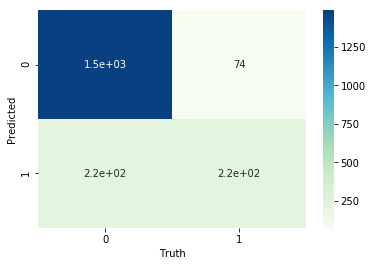

In [58]:
sea.heatmap(cm2, annot= True, cmap='GnBu')
plt.xlabel('Truth')
plt.ylabel('Predicted')

#### Applying Cross validation

In [59]:
acc = cross_val_score(estimator=d_class, X = x_train, y= y_train, cv=10, n_jobs=-1)

In [60]:
acc.mean()

0.8508736097634527

In [61]:
acc.std()

0.009720947590694834

The mean accuracy with a Decision Tree model is around 85% and also the mean variance is lower than the previous one. Thus, the model generalized well on the testing data even better.

### Parameter Tuning

In [65]:
from sklearn.model_selection import RandomizedSearchCV

In [66]:
def build_classifier(optim):
    classifier = Sequential()
    # input Layer and first inner layer with 6 nodes
    classifier.add(Dense(input_dim = 11, units = 6, activation = 'relu', kernel_initializer = 'uniform' ))
    classifier.add(Dropout(rate = 0.1))
    # second Layer 
    classifier.add(Dense(units = 8, activation = 'relu', kernel_initializer = 'uniform' ))
    classifier.add(Dropout(rate = 0.2))
    # output Layer
    classifier.add(Dense(units = 1, activation = 'sigmoid', kernel_initializer = 'uniform' ))

    classifier.compile(optimizer = optim, loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

classifier = KerasClassifier(build_fn=build_classifier, shuffle = True)

In [67]:
parameters = {'epochs' : [100, 150, 500],
             'batch_size' : [25, 32, 64],
             'optim' : ['adam', 'rmsprop']}

In [69]:
gridsearch = RandomizedSearchCV(estimator=classifier, param_distributions=parameters, n_iter = 10 , scoring= 'accuracy', cv = 10)

In [ ]:
gridsearch = gridsearch.fit(X = x_train, y = y_train )

Epoch 1/100
7200/7200 [==============================] - 4s 552us/step - loss: 0.5909 - acc: 0.8007
Epoch 2/100
7200/7200 [==============================] - 1s 93us/step - loss: 0.4413 - acc: 0.8007
Epoch 3/100
7200/7200 [==============================] - 1s 99us/step - loss: 0.4332 - acc: 0.8007
Epoch 4/100
7200/7200 [==============================] - 1s 97us/step - loss: 0.4293 - acc: 0.8007
Epoch 5/100
7200/7200 [==============================] - 1s 79us/step - loss: 0.4307 - acc: 0.8007
Epoch 6/100
7200/7200 [==============================] - 1s 190us/step - loss: 0.4305 - acc: 0.8007
Epoch 7/100
7200/7200 [==============================] - 1s 203us/step - loss: 0.4272 - acc: 0.8007
Epoch 8/100
7200/7200 [==============================] - 1s 143us/step - loss: 0.4259 - acc: 0.8007
Epoch 9/100
7200/7200 [==============================] - 1s 97us/step - loss: 0.4289 - acc: 0.8007
Epoch 10/100
7200/7200 [==============================] - 1s 100us/step - loss: 0.4279 - acc: 0.8007
Epoc

7200/7200 [==============================] - 1s 156us/step - loss: 0.4153 - acc: 0.8358
Epoch 83/100
7200/7200 [==============================] - 1s 94us/step - loss: 0.4175 - acc: 0.8375
Epoch 84/100
7200/7200 [==============================] - 1s 97us/step - loss: 0.4196 - acc: 0.8360
Epoch 85/100
7200/7200 [==============================] - 1s 99us/step - loss: 0.4162 - acc: 0.8368
Epoch 86/100
7200/7200 [==============================] - 1s 101us/step - loss: 0.4178 - acc: 0.8364
Epoch 87/100
7200/7200 [==============================] - 1s 129us/step - loss: 0.4186 - acc: 0.8357
Epoch 88/100
7200/7200 [==============================] - 1s 186us/step - loss: 0.4214 - acc: 0.8378
Epoch 89/100
7200/7200 [==============================] - 1s 189us/step - loss: 0.4160 - acc: 0.8385
Epoch 90/100
7200/7200 [==============================] - 1s 186us/step - loss: 0.4172 - acc: 0.8368
Epoch 91/100
7200/7200 [==============================] - 1s 98us/step - loss: 0.4209 - acc: 0.8363
Epoch 9

7200/7200 [==============================] - 1s 163us/step - loss: 0.4176 - acc: 0.8349
Epoch 64/100
7200/7200 [==============================] - 1s 98us/step - loss: 0.4170 - acc: 0.8371
Epoch 65/100
7200/7200 [==============================] - 1s 91us/step - loss: 0.4176 - acc: 0.8360
Epoch 66/100
7200/7200 [==============================] - 1s 99us/step - loss: 0.4191 - acc: 0.8347
Epoch 67/100
7200/7200 [==============================] - 1s 195us/step - loss: 0.4177 - acc: 0.8349
Epoch 68/100
7200/7200 [==============================] - 1s 185us/step - loss: 0.4173 - acc: 0.8360
Epoch 69/100
7200/7200 [==============================] - 1s 133us/step - loss: 0.4139 - acc: 0.8333
Epoch 70/100
7200/7200 [==============================] - 1s 94us/step - loss: 0.4216 - acc: 0.8332
Epoch 71/100
7200/7200 [==============================] - 1s 99us/step - loss: 0.4176 - acc: 0.8361
Epoch 72/100
7200/7200 [==============================] - 1s 93us/step - loss: 0.4151 - acc: 0.8354
Epoch 73/

7200/7200 [==============================] - 1s 85us/step - loss: 0.4181 - acc: 0.8371
Epoch 45/100
7200/7200 [==============================] - 1s 86us/step - loss: 0.4160 - acc: 0.8322
Epoch 46/100
7200/7200 [==============================] - 1s 175us/step - loss: 0.4204 - acc: 0.8367
Epoch 47/100
7200/7200 [==============================] - 1s 190us/step - loss: 0.4155 - acc: 0.8356
Epoch 48/100
7200/7200 [==============================] - 1s 189us/step - loss: 0.4167 - acc: 0.8361
Epoch 49/100
7200/7200 [==============================] - 1s 203us/step - loss: 0.4196 - acc: 0.8356
Epoch 50/100
7200/7200 [==============================] - 1s 118us/step - loss: 0.4197 - acc: 0.8333
Epoch 51/100
7200/7200 [==============================] - 1s 99us/step - loss: 0.4204 - acc: 0.8347
Epoch 52/100
7200/7200 [==============================] - 1s 92us/step - loss: 0.4209 - acc: 0.8350
Epoch 53/100
7200/7200 [==============================] - 1s 97us/step - loss: 0.4178 - acc: 0.8365
Epoch 54

7200/7200 [==============================] - 1s 136us/step - loss: 0.4246 - acc: 0.8300
Epoch 26/100
7200/7200 [==============================] - 1s 92us/step - loss: 0.4231 - acc: 0.8283
Epoch 27/100
7200/7200 [==============================] - 1s 92us/step - loss: 0.4234 - acc: 0.8324
Epoch 28/100
7200/7200 [==============================] - 1s 130us/step - loss: 0.4223 - acc: 0.8289
Epoch 29/100
7200/7200 [==============================] - 1s 198us/step - loss: 0.4220 - acc: 0.8306
Epoch 30/100
7200/7200 [==============================] - 1s 196us/step - loss: 0.4215 - acc: 0.8310
Epoch 31/100
7200/7200 [==============================] - 1s 176us/step - loss: 0.4206 - acc: 0.8311
Epoch 32/100
7200/7200 [==============================] - 1s 92us/step - loss: 0.4210 - acc: 0.8325
Epoch 33/100
7200/7200 [==============================] - 1s 103us/step - loss: 0.4229 - acc: 0.8325
Epoch 34/100
7200/7200 [==============================] - 1s 105us/step - loss: 0.4257 - acc: 0.8324
Epoch 

7200/7200 [==============================] - 1s 163us/step - loss: 0.4314 - acc: 0.7993
Epoch 7/100
7200/7200 [==============================] - 1s 112us/step - loss: 0.4270 - acc: 0.7993
Epoch 8/100
7200/7200 [==============================] - 1s 118us/step - loss: 0.4239 - acc: 0.7993
Epoch 9/100
7200/7200 [==============================] - 1s 119us/step - loss: 0.4253 - acc: 0.7993
Epoch 10/100
7200/7200 [==============================] - 1s 146us/step - loss: 0.4209 - acc: 0.7993
Epoch 11/100
7200/7200 [==============================] - 1s 192us/step - loss: 0.4227 - acc: 0.7993
Epoch 12/100
7200/7200 [==============================] - 1s 199us/step - loss: 0.4226 - acc: 0.7993
Epoch 13/100
7200/7200 [==============================] - 1s 115us/step - loss: 0.4214 - acc: 0.7993
Epoch 14/100
7200/7200 [==============================] - 1s 106us/step - loss: 0.4238 - acc: 0.7993
Epoch 15/100
7200/7200 [==============================] - 1s 118us/step - loss: 0.4214 - acc: 0.7993
Epoch 

7200/7200 [==============================] - 1s 188us/step - loss: 0.4142 - acc: 0.8374
Epoch 88/100
7200/7200 [==============================] - 1s 184us/step - loss: 0.4123 - acc: 0.8372
Epoch 89/100
7200/7200 [==============================] - 1s 115us/step - loss: 0.4140 - acc: 0.8381
Epoch 90/100
7200/7200 [==============================] - 1s 97us/step - loss: 0.4163 - acc: 0.8335
Epoch 91/100
7200/7200 [==============================] - 1s 94us/step - loss: 0.4135 - acc: 0.8371
Epoch 92/100
7200/7200 [==============================] - 1s 150us/step - loss: 0.4156 - acc: 0.8339
Epoch 93/100
7200/7200 [==============================] - 1s 188us/step - loss: 0.4171 - acc: 0.8350
Epoch 94/100
7200/7200 [==============================] - 1s 188us/step - loss: 0.4130 - acc: 0.8358
Epoch 95/100
7200/7200 [==============================] - 1s 99us/step - loss: 0.4142 - acc: 0.8358
Epoch 96/100
7200/7200 [==============================] - 1s 99us/step - loss: 0.4186 - acc: 0.8368
Epoch 9

7200/7200 [==============================] - 1s 180us/step - loss: 0.4209 - acc: 0.8343
Epoch 69/100
7200/7200 [==============================] - 1s 105us/step - loss: 0.4197 - acc: 0.8339
Epoch 70/100
7200/7200 [==============================] - 1s 98us/step - loss: 0.4182 - acc: 0.8333
Epoch 71/100
7200/7200 [==============================] - 1s 103us/step - loss: 0.4172 - acc: 0.8344
Epoch 72/100
7200/7200 [==============================] - 1s 111us/step - loss: 0.4171 - acc: 0.8311
Epoch 73/100
7200/7200 [==============================] - 1s 166us/step - loss: 0.4177 - acc: 0.8329
Epoch 74/100
7200/7200 [==============================] - 1s 194us/step - loss: 0.4215 - acc: 0.8325
Epoch 75/100
7200/7200 [==============================] - 1s 183us/step - loss: 0.4201 - acc: 0.8328
Epoch 76/100
7200/7200 [==============================] - 1s 104us/step - loss: 0.4243 - acc: 0.8337
Epoch 77/100
7200/7200 [==============================] - 1s 95us/step - loss: 0.4159 - acc: 0.8346
Epoch

7200/7200 [==============================] - 1s 115us/step - loss: 0.3832 - acc: 0.8390
Epoch 50/100
7200/7200 [==============================] - 1s 189us/step - loss: 0.3832 - acc: 0.8421
Epoch 51/100
7200/7200 [==============================] - 1s 197us/step - loss: 0.3809 - acc: 0.8413
Epoch 52/100
7200/7200 [==============================] - 1s 171us/step - loss: 0.3819 - acc: 0.8414
Epoch 53/100
7200/7200 [==============================] - 1s 190us/step - loss: 0.3848 - acc: 0.8397
Epoch 54/100
7200/7200 [==============================] - 1s 135us/step - loss: 0.3810 - acc: 0.8413
Epoch 55/100
7200/7200 [==============================] - 1s 91us/step - loss: 0.3837 - acc: 0.8417
Epoch 56/100
7200/7200 [==============================] - 1s 90us/step - loss: 0.3823 - acc: 0.8428
Epoch 57/100
7200/7200 [==============================] - 1s 101us/step - loss: 0.3827 - acc: 0.8440
Epoch 58/100
7200/7200 [==============================] - 1s 189us/step - loss: 0.3800 - acc: 0.8461
Epoch

7200/7200 [==============================] - 1s 111us/step - loss: 0.4163 - acc: 0.8328
Epoch 31/100
7200/7200 [==============================] - 1s 96us/step - loss: 0.4181 - acc: 0.8308
Epoch 32/100
7200/7200 [==============================] - 1s 189us/step - loss: 0.4148 - acc: 0.8335
Epoch 33/100
7200/7200 [==============================] - 1s 168us/step - loss: 0.4169 - acc: 0.8333
Epoch 34/100
7200/7200 [==============================] - 1s 174us/step - loss: 0.4149 - acc: 0.8335
Epoch 35/100
7200/7200 [==============================] - 1s 163us/step - loss: 0.4121 - acc: 0.8339
Epoch 36/100
7200/7200 [==============================] - 1s 165us/step - loss: 0.4145 - acc: 0.8344
Epoch 37/100
7200/7200 [==============================] - 1s 181us/step - loss: 0.4153 - acc: 0.8346
Epoch 38/100
7200/7200 [==============================] - 1s 171us/step - loss: 0.4143 - acc: 0.8360
Epoch 39/100
7200/7200 [==============================] - 1s 167us/step - loss: 0.4184 - acc: 0.8333
Epoc

7200/7200 [==============================] - 1s 208us/step - loss: 0.4259 - acc: 0.7999
Epoch 12/100
7200/7200 [==============================] - 1s 189us/step - loss: 0.4220 - acc: 0.7999
Epoch 13/100
7200/7200 [==============================] - 1s 198us/step - loss: 0.4235 - acc: 0.7999
Epoch 14/100
7200/7200 [==============================] - 1s 107us/step - loss: 0.4250 - acc: 0.7999
Epoch 15/100
7200/7200 [==============================] - 1s 99us/step - loss: 0.4239 - acc: 0.8060
Epoch 16/100
7200/7200 [==============================] - 1s 104us/step - loss: 0.4228 - acc: 0.8199
Epoch 17/100
7200/7200 [==============================] - 1s 111us/step - loss: 0.4188 - acc: 0.8276
Epoch 18/100
7200/7200 [==============================] - 1s 156us/step - loss: 0.4211 - acc: 0.8299
Epoch 19/100
7200/7200 [==============================] - 2s 210us/step - loss: 0.4212 - acc: 0.8297
Epoch 20/100
7200/7200 [==============================] - 1s 189us/step - loss: 0.4261 - acc: 0.8317
Epoc

7200/7200 [==============================] - 1s 115us/step - loss: 0.4158 - acc: 0.8371
Epoch 93/100
7200/7200 [==============================] - 1s 79us/step - loss: 0.4163 - acc: 0.8375
Epoch 94/100
7200/7200 [==============================] - 1s 102us/step - loss: 0.4175 - acc: 0.8369
Epoch 95/100
7200/7200 [==============================] - 1s 105us/step - loss: 0.4180 - acc: 0.8376
Epoch 96/100
7200/7200 [==============================] - 1s 100us/step - loss: 0.4166 - acc: 0.8382
Epoch 97/100
7200/7200 [==============================] - 1s 173us/step - loss: 0.4152 - acc: 0.8376
Epoch 98/100
7200/7200 [==============================] - 1s 190us/step - loss: 0.4157 - acc: 0.8382
Epoch 99/100
7200/7200 [==============================] - 1s 178us/step - loss: 0.4147 - acc: 0.8385
Epoch 100/100
7200/7200 [==============================] - 1s 206us/step - loss: 0.4150 - acc: 0.8385
Epoch 1/100
7200/7200 [==============================] - 3s 463us/step - loss: 0.5768 - acc: 0.7992
Epoc

7200/7200 [==============================] - 1s 151us/step - loss: 0.4146 - acc: 0.8342
Epoch 74/100
7200/7200 [==============================] - 1s 110us/step - loss: 0.4150 - acc: 0.8368
Epoch 75/100
7200/7200 [==============================] - 1s 99us/step - loss: 0.4165 - acc: 0.8371
Epoch 76/100
7200/7200 [==============================] - 1s 107us/step - loss: 0.4188 - acc: 0.8329
Epoch 77/100
7200/7200 [==============================] - 1s 113us/step - loss: 0.4163 - acc: 0.8343
Epoch 78/100
7200/7200 [==============================] - 1s 202us/step - loss: 0.4152 - acc: 0.8351
Epoch 79/100
7200/7200 [==============================] - 1s 204us/step - loss: 0.4149 - acc: 0.8339
Epoch 80/100
7200/7200 [==============================] - 2s 215us/step - loss: 0.4168 - acc: 0.8342
Epoch 81/100
7200/7200 [==============================] - 1s 189us/step - loss: 0.4157 - acc: 0.8368
Epoch 82/100
7200/7200 [==============================] - 1s 155us/step - loss: 0.4165 - acc: 0.8361
Epoc

7200/7200 [==============================] - 1s 152us/step - loss: 0.4132 - acc: 0.8360
Epoch 55/150
7200/7200 [==============================] - 1s 102us/step - loss: 0.4129 - acc: 0.8349
Epoch 56/150
7200/7200 [==============================] - 1s 97us/step - loss: 0.4105 - acc: 0.8357
Epoch 57/150
7200/7200 [==============================] - 1s 96us/step - loss: 0.4086 - acc: 0.8351
Epoch 58/150
7200/7200 [==============================] - 1s 103us/step - loss: 0.4092 - acc: 0.8342
Epoch 59/150
7200/7200 [==============================] - 1s 168us/step - loss: 0.4117 - acc: 0.8356
Epoch 60/150
7200/7200 [==============================] - 1s 196us/step - loss: 0.4166 - acc: 0.8319
Epoch 61/150
7200/7200 [==============================] - 1s 201us/step - loss: 0.4115 - acc: 0.8340
Epoch 62/150
7200/7200 [==============================] - 2s 212us/step - loss: 0.4135 - acc: 0.8322
Epoch 63/150
7200/7200 [==============================] - 1s 198us/step - loss: 0.4138 - acc: 0.8350
Epoch

7200/7200 [==============================] - 1s 76us/step - loss: 0.4122 - acc: 0.8393
Epoch 136/150
7200/7200 [==============================] - 1s 82us/step - loss: 0.4101 - acc: 0.8406
Epoch 137/150
7200/7200 [==============================] - 1s 83us/step - loss: 0.4104 - acc: 0.8371
Epoch 138/150
7200/7200 [==============================] - 1s 144us/step - loss: 0.4096 - acc: 0.8374
Epoch 139/150
7200/7200 [==============================] - 1s 152us/step - loss: 0.4120 - acc: 0.8374
Epoch 140/150
7200/7200 [==============================] - 1s 162us/step - loss: 0.4113 - acc: 0.8361
Epoch 141/150
7200/7200 [==============================] - 1s 140us/step - loss: 0.4124 - acc: 0.8368
Epoch 142/150
7200/7200 [==============================] - 1s 88us/step - loss: 0.4124 - acc: 0.8358
Epoch 143/150
7200/7200 [==============================] - 0s 69us/step - loss: 0.4107 - acc: 0.8365
Epoch 144/150
7200/7200 [==============================] - 1s 95us/step - loss: 0.4131 - acc: 0.8374


7200/7200 [==============================] - 1s 148us/step - loss: 0.4183 - acc: 0.8369
Epoch 67/150
7200/7200 [==============================] - 1s 172us/step - loss: 0.4137 - acc: 0.8381
Epoch 68/150
7200/7200 [==============================] - 1s 161us/step - loss: 0.4152 - acc: 0.8369
Epoch 69/150
7200/7200 [==============================] - 1s 198us/step - loss: 0.4147 - acc: 0.8386
Epoch 70/150
7200/7200 [==============================] - 1s 148us/step - loss: 0.4139 - acc: 0.8379
Epoch 71/150
7200/7200 [==============================] - 1s 80us/step - loss: 0.4135 - acc: 0.8371
Epoch 72/150
7200/7200 [==============================] - 1s 82us/step - loss: 0.4157 - acc: 0.8382
Epoch 73/150
7200/7200 [==============================] - 1s 71us/step - loss: 0.4146 - acc: 0.8381
Epoch 74/150
7200/7200 [==============================] - 1s 89us/step - loss: 0.4164 - acc: 0.8360
Epoch 75/150
7200/7200 [==============================] - 1s 155us/step - loss: 0.4110 - acc: 0.8371
Epoch 7

7200/7200 [==============================] - 1s 178us/step - loss: 0.4138 - acc: 0.8399
Epoch 148/150
7200/7200 [==============================] - 2s 219us/step - loss: 0.4131 - acc: 0.8390
Epoch 149/150
7200/7200 [==============================] - 1s 170us/step - loss: 0.4153 - acc: 0.8376
Epoch 150/150
7200/7200 [==============================] - 1s 187us/step - loss: 0.4122 - acc: 0.8392
Epoch 1/150
7200/7200 [==============================] - 5s 732us/step - loss: 0.5799 - acc: 0.7974
Epoch 2/150
7200/7200 [==============================] - 1s 73us/step - loss: 0.4469 - acc: 0.7976
Epoch 3/150
7200/7200 [==============================] - 1s 89us/step - loss: 0.4365 - acc: 0.7976
Epoch 4/150
7200/7200 [==============================] - 1s 79us/step - loss: 0.4333 - acc: 0.7976
Epoch 5/150
7200/7200 [==============================] - 1s 80us/step - loss: 0.4285 - acc: 0.7976
Epoch 6/150
7200/7200 [==============================] - 1s 75us/step - loss: 0.4265 - acc: 0.7976
Epoch 7/150

7200/7200 [==============================] - 0s 67us/step - loss: 0.4152 - acc: 0.8363
Epoch 79/150
7200/7200 [==============================] - 0s 69us/step - loss: 0.4128 - acc: 0.8364
Epoch 80/150
7200/7200 [==============================] - 1s 86us/step - loss: 0.4168 - acc: 0.8343
Epoch 81/150
7200/7200 [==============================] - 1s 153us/step - loss: 0.4172 - acc: 0.8358
Epoch 82/150
7200/7200 [==============================] - 1s 196us/step - loss: 0.4173 - acc: 0.8351
Epoch 83/150
7200/7200 [==============================] - 1s 154us/step - loss: 0.4130 - acc: 0.8357
Epoch 84/150
7200/7200 [==============================] - 1s 76us/step - loss: 0.4144 - acc: 0.8365
Epoch 85/150
7200/7200 [==============================] - 1s 84us/step - loss: 0.4132 - acc: 0.8363
Epoch 86/150
7200/7200 [==============================] - 1s 92us/step - loss: 0.4161 - acc: 0.8350
Epoch 87/150
7200/7200 [==============================] - 1s 98us/step - loss: 0.4159 - acc: 0.8351
Epoch 88/1

7200/7200 [==============================] - 1s 137us/step - loss: 0.4231 - acc: 0.8004
Epoch 10/150
7200/7200 [==============================] - 1s 141us/step - loss: 0.4204 - acc: 0.8004
Epoch 11/150
7200/7200 [==============================] - 1s 175us/step - loss: 0.4205 - acc: 0.8004
Epoch 12/150
7200/7200 [==============================] - 1s 119us/step - loss: 0.4216 - acc: 0.8126
Epoch 13/150
7200/7200 [==============================] - 1s 86us/step - loss: 0.4205 - acc: 0.8300
Epoch 14/150
7200/7200 [==============================] - 1s 86us/step - loss: 0.4211 - acc: 0.8306
Epoch 15/150
7200/7200 [==============================] - 1s 78us/step - loss: 0.4183 - acc: 0.8310
Epoch 16/150
7200/7200 [==============================] - 1s 123us/step - loss: 0.4209 - acc: 0.8333
Epoch 17/150
7200/7200 [==============================] - 1s 153us/step - loss: 0.4202 - acc: 0.8322
Epoch 18/150
7200/7200 [==============================] - 1s 152us/step - loss: 0.4192 - acc: 0.8353
Epoch 

7200/7200 [==============================] - 1s 109us/step - loss: 0.4151 - acc: 0.8389
Epoch 91/150
7200/7200 [==============================] - 1s 187us/step - loss: 0.4187 - acc: 0.8396
Epoch 92/150
7200/7200 [==============================] - 1s 156us/step - loss: 0.4133 - acc: 0.8372
Epoch 93/150
7200/7200 [==============================] - 1s 154us/step - loss: 0.4168 - acc: 0.8381
Epoch 94/150
7200/7200 [==============================] - 1s 124us/step - loss: 0.4199 - acc: 0.8379
Epoch 95/150
7200/7200 [==============================] - 1s 71us/step - loss: 0.4196 - acc: 0.8357
Epoch 96/150
7200/7200 [==============================] - 1s 83us/step - loss: 0.4175 - acc: 0.8368
Epoch 97/150
7200/7200 [==============================] - 0s 67us/step - loss: 0.4180 - acc: 0.8396
Epoch 98/150
7200/7200 [==============================] - 1s 75us/step - loss: 0.4211 - acc: 0.8382
Epoch 99/150
7200/7200 [==============================] - 1s 187us/step - loss: 0.4169 - acc: 0.8349
Epoch 1

7200/7200 [==============================] - 1s 74us/step - loss: 0.4159 - acc: 0.8361
Epoch 22/150
7200/7200 [==============================] - 1s 94us/step - loss: 0.4129 - acc: 0.8335
Epoch 23/150
7200/7200 [==============================] - 1s 141us/step - loss: 0.4135 - acc: 0.8331
Epoch 24/150
7200/7200 [==============================] - 1s 152us/step - loss: 0.4145 - acc: 0.8333
Epoch 25/150
7200/7200 [==============================] - 1s 152us/step - loss: 0.4147 - acc: 0.8357
Epoch 26/150
7200/7200 [==============================] - 1s 156us/step - loss: 0.4162 - acc: 0.8349
Epoch 27/150
7200/7200 [==============================] - 1s 85us/step - loss: 0.4164 - acc: 0.8372
Epoch 28/150
7200/7200 [==============================] - 1s 75us/step - loss: 0.4192 - acc: 0.8335
Epoch 29/150
7200/7200 [==============================] - 1s 78us/step - loss: 0.4173 - acc: 0.8343
Epoch 30/150
7200/7200 [==============================] - 1s 86us/step - loss: 0.4156 - acc: 0.8356
Epoch 31/

7200/7200 [==============================] - 1s 84us/step - loss: 0.4142 - acc: 0.8372
Epoch 103/150
7200/7200 [==============================] - 1s 90us/step - loss: 0.4135 - acc: 0.8372
Epoch 104/150
7200/7200 [==============================] - 1s 82us/step - loss: 0.4122 - acc: 0.8350
Epoch 105/150
7200/7200 [==============================] - 1s 169us/step - loss: 0.4169 - acc: 0.8367
Epoch 106/150
7200/7200 [==============================] - 1s 179us/step - loss: 0.4113 - acc: 0.8367
Epoch 107/150
7200/7200 [==============================] - 1s 146us/step - loss: 0.4129 - acc: 0.8383
Epoch 108/150
7200/7200 [==============================] - 1s 82us/step - loss: 0.4152 - acc: 0.8374
Epoch 109/150
7200/7200 [==============================] - 1s 97us/step - loss: 0.4153 - acc: 0.8375
Epoch 110/150
7200/7200 [==============================] - 1s 85us/step - loss: 0.4118 - acc: 0.8376
Epoch 111/150
7200/7200 [==============================] - 1s 71us/step - loss: 0.4131 - acc: 0.8382
E

7200/7200 [==============================] - 1s 126us/step - loss: 0.4243 - acc: 0.8292
Epoch 34/150
7200/7200 [==============================] - 1s 134us/step - loss: 0.4249 - acc: 0.8313
Epoch 35/150
7200/7200 [==============================] - 1s 81us/step - loss: 0.4251 - acc: 0.8279
Epoch 36/150
7200/7200 [==============================] - 1s 78us/step - loss: 0.4241 - acc: 0.8274
Epoch 37/150
7200/7200 [==============================] - 1s 77us/step - loss: 0.4239 - acc: 0.8311
Epoch 38/150
7200/7200 [==============================] - 1s 104us/step - loss: 0.4199 - acc: 0.8317
Epoch 39/150
7200/7200 [==============================] - 1s 156us/step - loss: 0.4250 - acc: 0.8328
Epoch 40/150
7200/7200 [==============================] - 1s 140us/step - loss: 0.4238 - acc: 0.8321
Epoch 41/150
7200/7200 [==============================] - 1s 143us/step - loss: 0.4224 - acc: 0.8314
Epoch 42/150
7200/7200 [==============================] - 1s 200us/step - loss: 0.4244 - acc: 0.8310
Epoch 

7200/7200 [==============================] - 1s 133us/step - loss: 0.4208 - acc: 0.8358
Epoch 115/150
7200/7200 [==============================] - 1s 98us/step - loss: 0.4173 - acc: 0.8325
Epoch 116/150
7200/7200 [==============================] - 1s 104us/step - loss: 0.4222 - acc: 0.8346
Epoch 117/150
7200/7200 [==============================] - 1s 87us/step - loss: 0.4208 - acc: 0.8367
Epoch 118/150
7200/7200 [==============================] - 1s 93us/step - loss: 0.4207 - acc: 0.8340
Epoch 119/150
7200/7200 [==============================] - 1s 87us/step - loss: 0.4211 - acc: 0.8344
Epoch 120/150
7200/7200 [==============================] - 1s 183us/step - loss: 0.4226 - acc: 0.8344
Epoch 121/150
7200/7200 [==============================] - 1s 167us/step - loss: 0.4229 - acc: 0.8363
Epoch 122/150
7200/7200 [==============================] - 1s 136us/step - loss: 0.4211 - acc: 0.8342
Epoch 123/150
7200/7200 [==============================] - 1s 75us/step - loss: 0.4216 - acc: 0.8342

7200/7200 [==============================] - 1s 158us/step - loss: 0.4241 - acc: 0.8308
Epoch 46/150
7200/7200 [==============================] - 1s 148us/step - loss: 0.4222 - acc: 0.8326
Epoch 47/150
7200/7200 [==============================] - 1s 131us/step - loss: 0.4203 - acc: 0.8308
Epoch 48/150
7200/7200 [==============================] - 1s 167us/step - loss: 0.4228 - acc: 0.8288
Epoch 49/150
7200/7200 [==============================] - 1s 92us/step - loss: 0.4208 - acc: 0.8300
Epoch 50/150
7200/7200 [==============================] - 1s 79us/step - loss: 0.4237 - acc: 0.8286
Epoch 51/150
7200/7200 [==============================] - 1s 108us/step - loss: 0.4257 - acc: 0.8293
Epoch 52/150
7200/7200 [==============================] - 1s 112us/step - loss: 0.4250 - acc: 0.8325
Epoch 53/150
7200/7200 [==============================] - 1s 90us/step - loss: 0.4203 - acc: 0.8333
Epoch 54/150
7200/7200 [==============================] - 1s 160us/step - loss: 0.4221 - acc: 0.8321
Epoch 

7200/7200 [==============================] - 1s 134us/step - loss: 0.4223 - acc: 0.8343
Epoch 127/150
7200/7200 [==============================] - 1s 100us/step - loss: 0.4182 - acc: 0.8344
Epoch 128/150
7200/7200 [==============================] - 1s 82us/step - loss: 0.4197 - acc: 0.8342
Epoch 129/150
7200/7200 [==============================] - 1s 119us/step - loss: 0.4178 - acc: 0.8331
Epoch 130/150
7200/7200 [==============================] - 1s 90us/step - loss: 0.4248 - acc: 0.8335
Epoch 131/150
7200/7200 [==============================] - 1s 73us/step - loss: 0.4217 - acc: 0.8351
Epoch 132/150
7200/7200 [==============================] - 1s 155us/step - loss: 0.4206 - acc: 0.8342
Epoch 133/150
7200/7200 [==============================] - 1s 144us/step - loss: 0.4239 - acc: 0.8326
Epoch 134/150
7200/7200 [==============================] - 1s 145us/step - loss: 0.4200 - acc: 0.8329
Epoch 135/150
7200/7200 [==============================] - 1s 147us/step - loss: 0.4195 - acc: 0.83

In [ ]:
best_params = gridsearch.best_params_
best_acc = gridsearch.best_score_